In [4]:
%load_ext autoreload
%autoreload 2
import sympy as smp
import numpy as np
import scipy.special as sp

import matplotlib.pyplot as plt
#from matplotlib import animation
%matplotlib inline

import seaborn as sns
color_names = ["windows blue",
               "red",
               "gold",
               "grass green"]
colors = sns.xkcd_palette(color_names)
sns.set_style("white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Load results
ELBO_grep = np.loadtxt('results/grep_gammaDEF_elbo.txt')
ELBO_advi = np.loadtxt('results/faces_elbo_advi.csv')
ELBO_bbvi = np.loadtxt('results/faces_elbo_bbvi.csv')
ELBO_R1 = np.load('results/Olivette_Eta0.75_B4_corrTrue_ELBO.npy')
ELBO_R1 = ELBO_R1[ELBO_R1<0.]

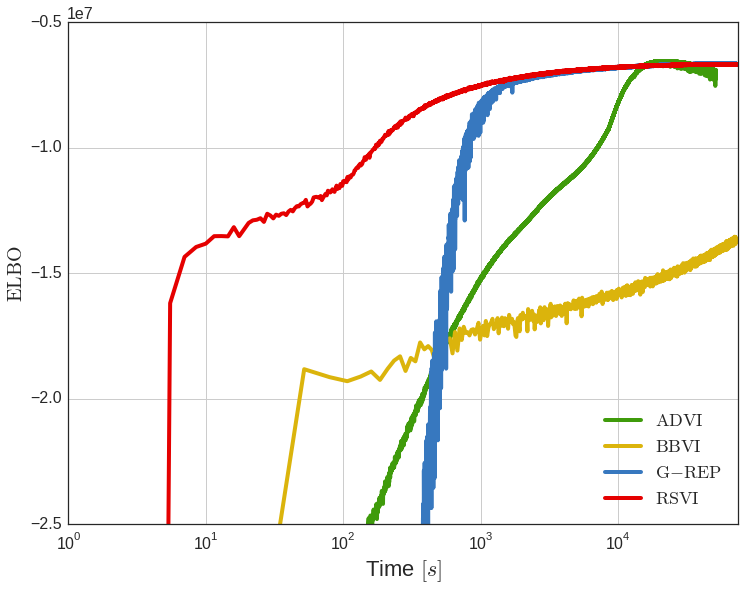

In [8]:
# Versus time
max_time = 75000
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)

# ADVI
ind = 2.*ELBO_advi[:,0] < max_time
ax.semilogx(2.*ELBO_advi[ind,0],ELBO_advi[ind,1], color=colors[3],lw=4, label='$\\mathrm{ADVI}$')

# BBVI
ind = 2.*ELBO_bbvi[:,0] < max_time
ax.semilogx(2.*ELBO_bbvi[ind,0],ELBO_bbvi[ind,1], color=colors[2],lw=4, label='$\\mathrm{BBVI}$')

# G-REP
ind = 2.*ELBO_grep[:,1] < max_time
ax.semilogx(2.*ELBO_grep[ind,1],ELBO_grep[ind,2], color=colors[0],lw=4, label='$\\mathrm{G-REP}$')

# Rejection
time_rejection = 1.5 # Relative time versus ELBO_grep
time_vec = time_rejection*np.arange(ELBO_R1.shape[0])+time_rejection
ind = time_vec < max_time
ax.semilogx(time_vec[ind]+1,ELBO_R1[ind], color=colors[1],lw=4, label='$\\mathrm{RSVI}$')

ax.grid()
ax.set_ylim(-2.5e7, -0.5e7)
ax.set_xlim(1,max_time)
ax.yaxis.get_offset_text().set_fontsize(16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.set_xlabel("Time $[s]$", fontsize=22)
ax.set_ylabel('$\\mathrm{ELBO}$',fontsize=20)
ax.legend(loc='lower right',fontsize=18)
filename = 'plots/Olivette_time.pdf'
plt.savefig(filename, bbox_inches='tight',dpi=300)